In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

100% 1.02G/1.03G [00:09<00:00, 67.3MB/s]
100% 1.03G/1.03G [00:09<00:00, 120MB/s] 


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from IPython.display import Image, display

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

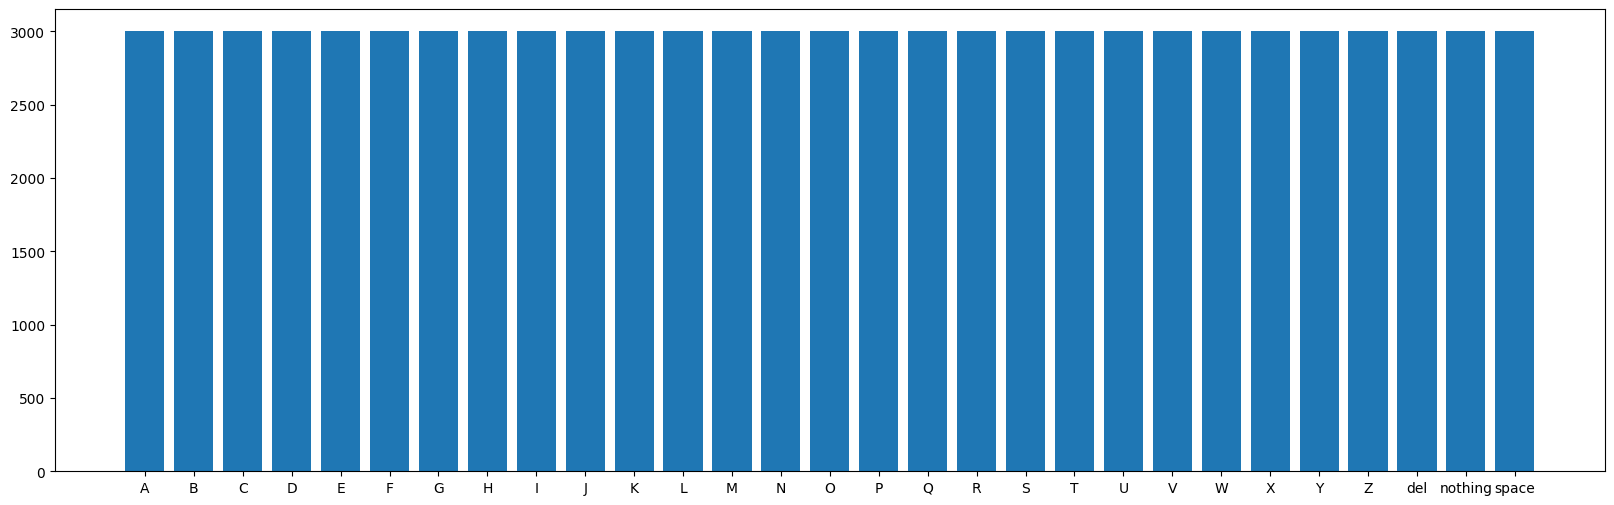

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


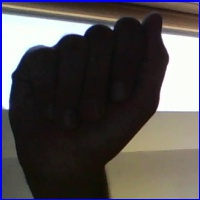

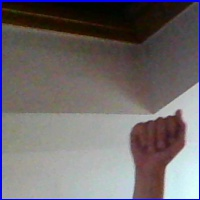

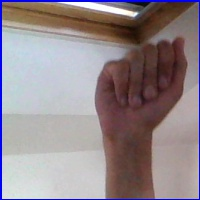

There are 3000 images in A class.

B


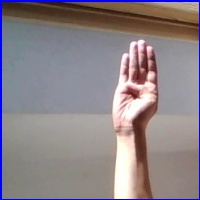

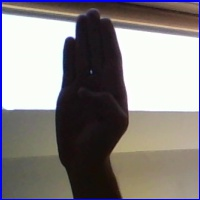

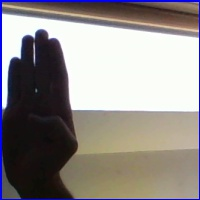

There are 3000 images in B class.

C


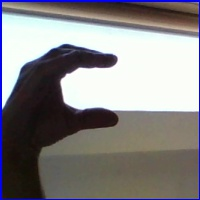

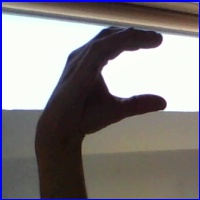

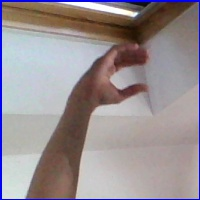

There are 3000 images in C class.

D


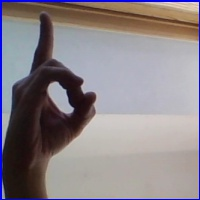

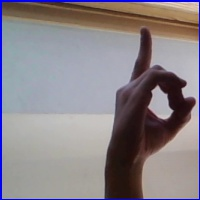

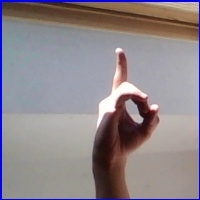

There are 3000 images in D class.

E


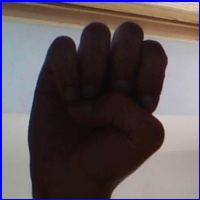

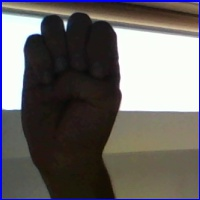

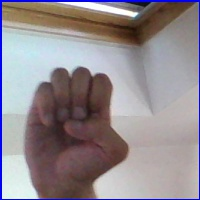

There are 3000 images in E class.

F


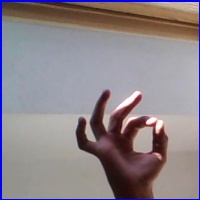

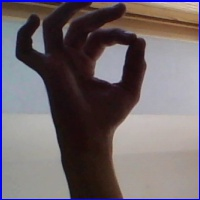

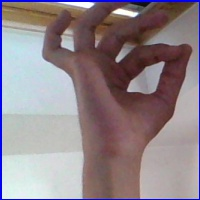

There are 3000 images in F class.

G


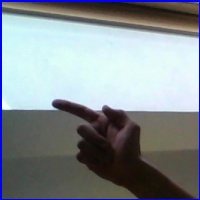

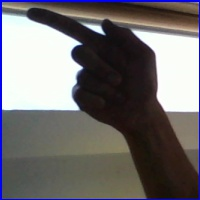

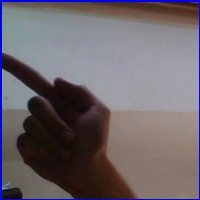

There are 3000 images in G class.

H


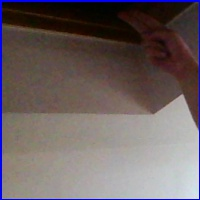

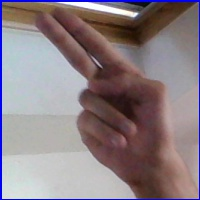

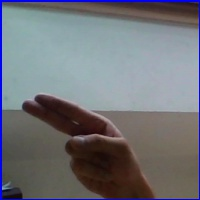

There are 3000 images in H class.

I


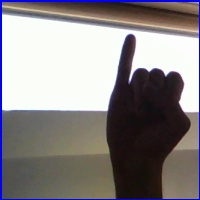

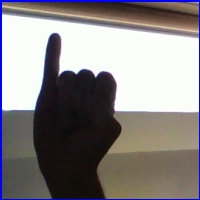

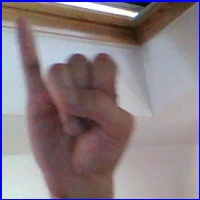

There are 3000 images in I class.

J


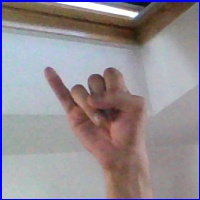

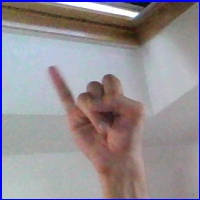

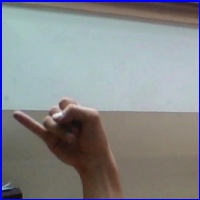

There are 3000 images in J class.

K


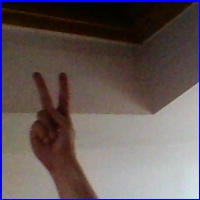

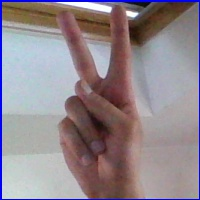

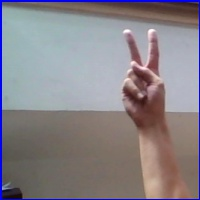

There are 3000 images in K class.

L


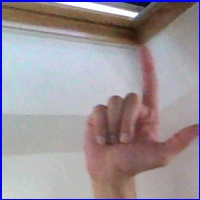

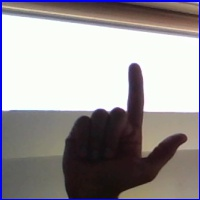

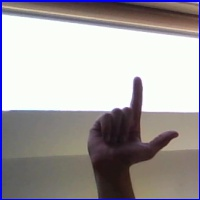

There are 3000 images in L class.

M


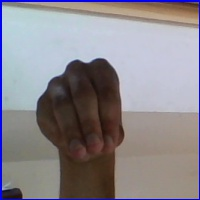

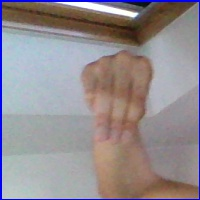

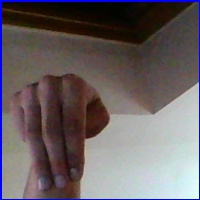

There are 3000 images in M class.

N


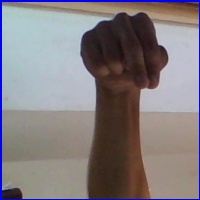

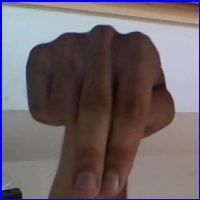

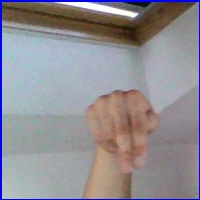

There are 3000 images in N class.

O


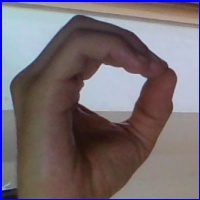

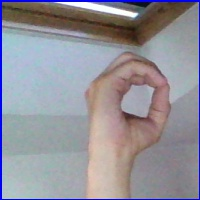

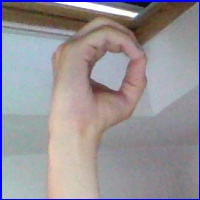

There are 3000 images in O class.

P


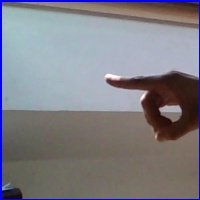

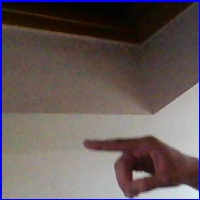

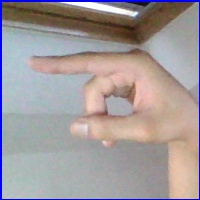

There are 3000 images in P class.

Q


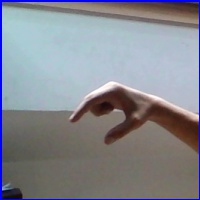

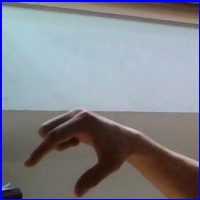

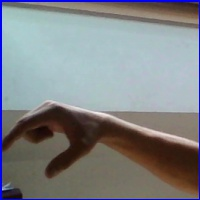

There are 3000 images in Q class.

R


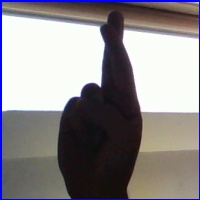

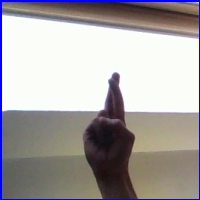

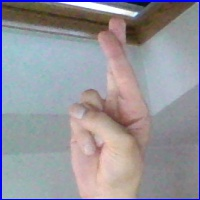

There are 3000 images in R class.

S


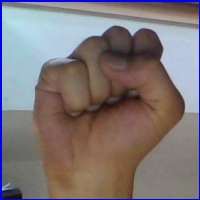

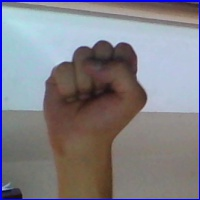

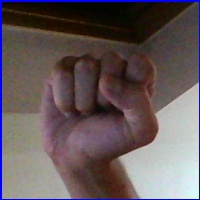

There are 3000 images in S class.

T


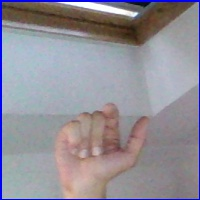

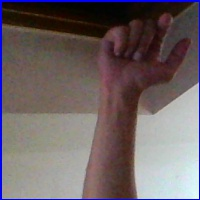

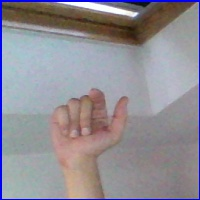

There are 3000 images in T class.

U


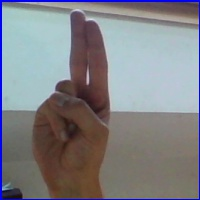

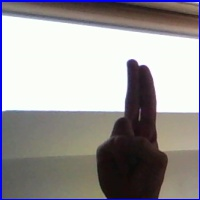

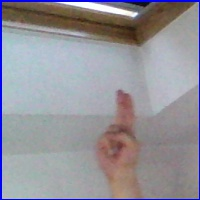

There are 3000 images in U class.

V


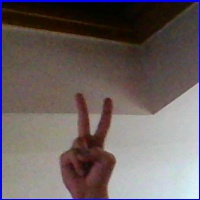

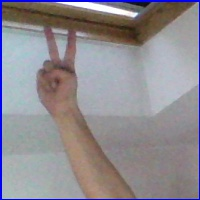

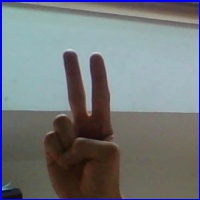

There are 3000 images in V class.

W


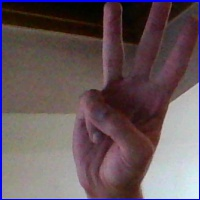

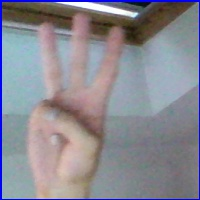

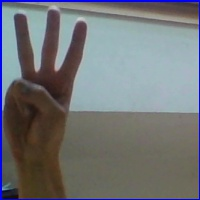

There are 3000 images in W class.

X


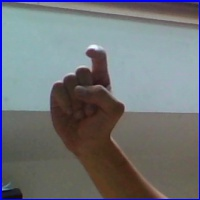

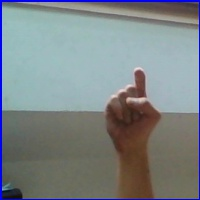

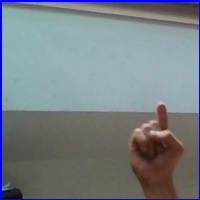

There are 3000 images in X class.

Y


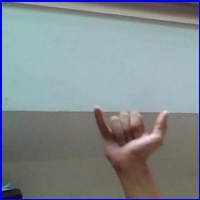

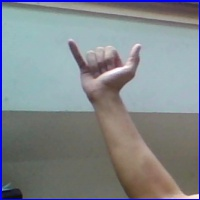

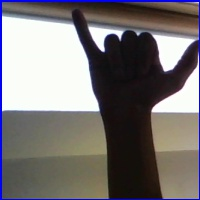

There are 3000 images in Y class.

Z


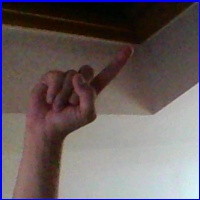

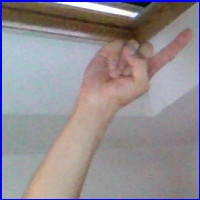

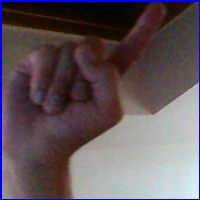

There are 3000 images in Z class.

del


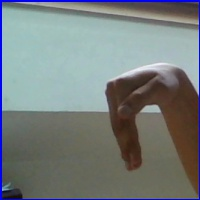

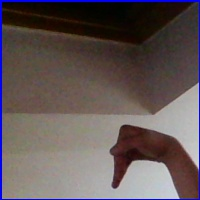

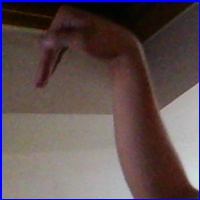

There are 3000 images in del class.

nothing


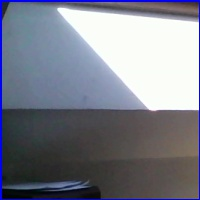

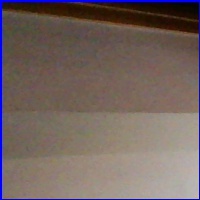

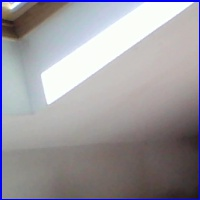

There are 3000 images in nothing class.

space


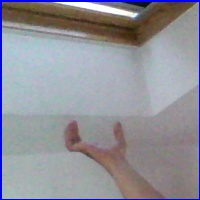

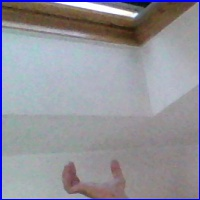

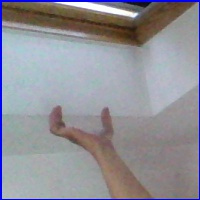

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
# trainsize = 200

training_data=[]
def create_training_data():
    for category in labels:
        k = 0
        path = os.path.join(train_path, category)
        class_num=labels.index(category)
        for img in os.listdir(path):
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(32,32))
                training_data.append([new_array,class_num])
                # k += 1
                # if k >= trainsize:
                #   break

create_training_data()      

In [ ]:
print(len(training_data))

5800


In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(len(training_data),-1)

In [ ]:
X.shape

(5800, 3072)

In [ ]:
X = X/255.0

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(5800,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
ydtc = dtc.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, ydtc))

Accuracy is 0.884183908045977


In [ ]:
print(classification_report(y_test,ydtc))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       739
           1       0.77      0.77      0.77       716
           2       0.83      0.84      0.83       772
           3       0.81      0.80      0.80       727
           4       0.83      0.85      0.84       728
           5       0.88      0.86      0.87       737
           6       0.92      0.91      0.91       739
           7       0.94      0.93      0.94       744
           8       0.90      0.90      0.90       749
           9       0.90      0.90      0.90       742
          10       0.87      0.91      0.89       760
          11       0.92      0.93      0.92       788
          12       0.90      0.92      0.91       802
          13       0.93      0.94      0.93       783
          14       0.91      0.91      0.91       744
          15       0.96      0.94      0.95       705
          16       0.96      0.97      0.97       717
          17       0.93    

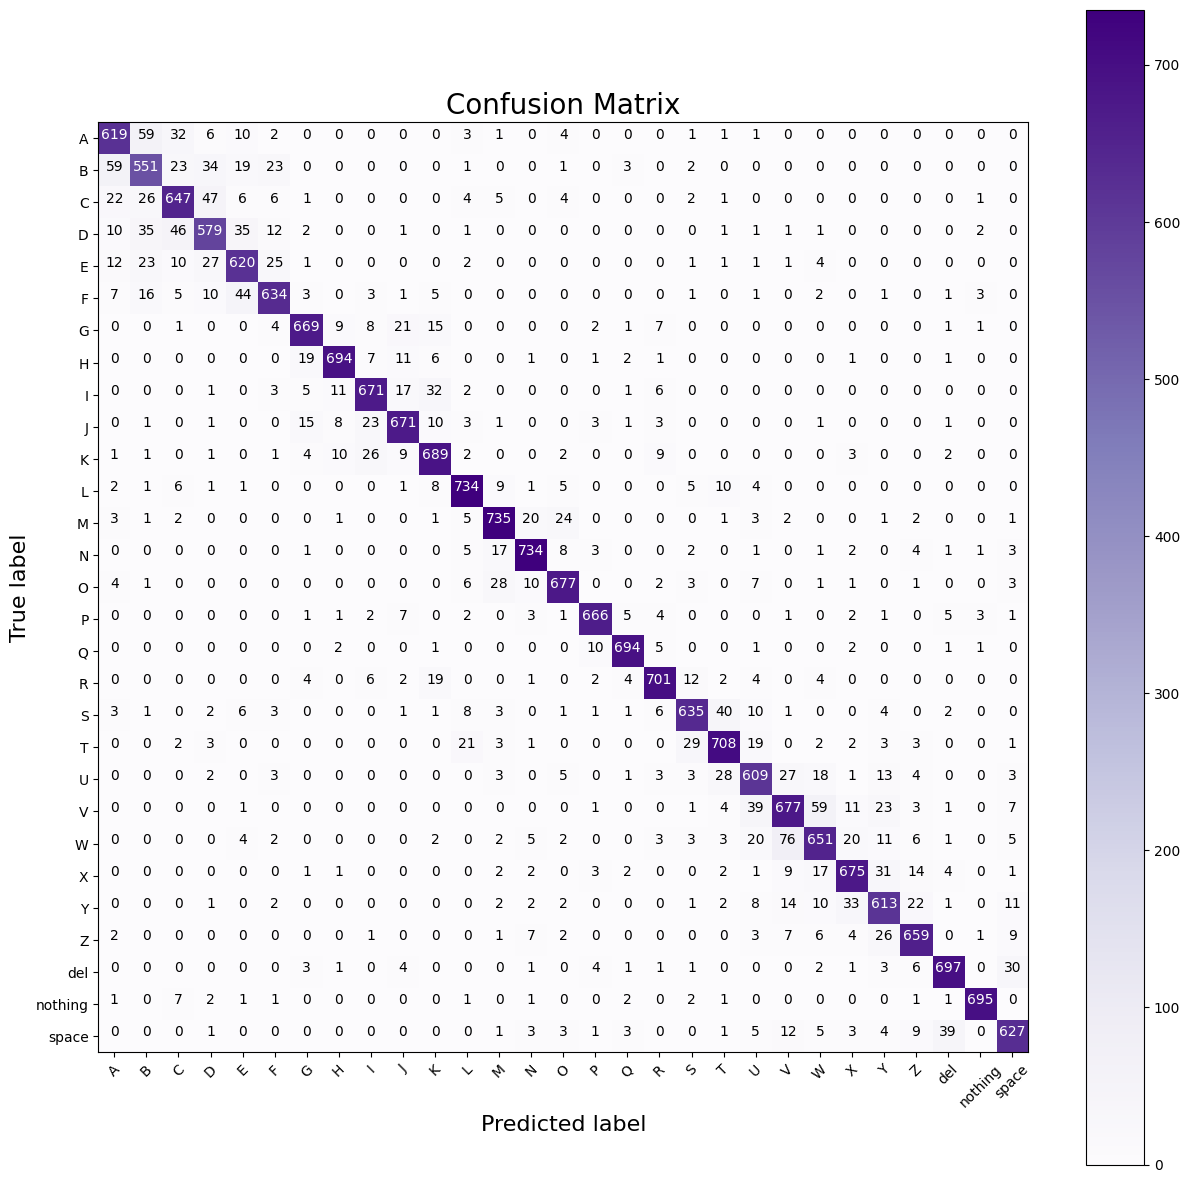

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, ydtc)

In [ ]:
params_rand = {'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=params_rand, refit=True, verbose=3, scoring="accuracy", n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=3)

In [ ]:
ydtcgrid = grid_search_dt.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, ydtcgrid))

Accuracy is 0.6159540229885058


In [ ]:
print(classification_report(y_test,ydtcgrid))

              precision    recall  f1-score   support

           0       0.43      0.57      0.49       739
           1       0.35      0.29      0.32       716
           2       0.65      0.26      0.37       772
           3       0.33      0.67      0.44       727
           4       0.62      0.56      0.59       728
           5       0.65      0.52      0.58       737
           6       0.77      0.85      0.81       739
           7       0.83      0.77      0.80       744
           8       0.73      0.83      0.77       749
           9       0.79      0.73      0.76       742
          10       0.83      0.72      0.77       760
          11       0.87      0.81      0.84       788
          12       0.77      0.67      0.72       802
          13       0.68      0.81      0.74       783
          14       0.72      0.64      0.68       744
          15       0.84      0.88      0.86       705
          16       0.85      0.85      0.85       717
          17       0.61    

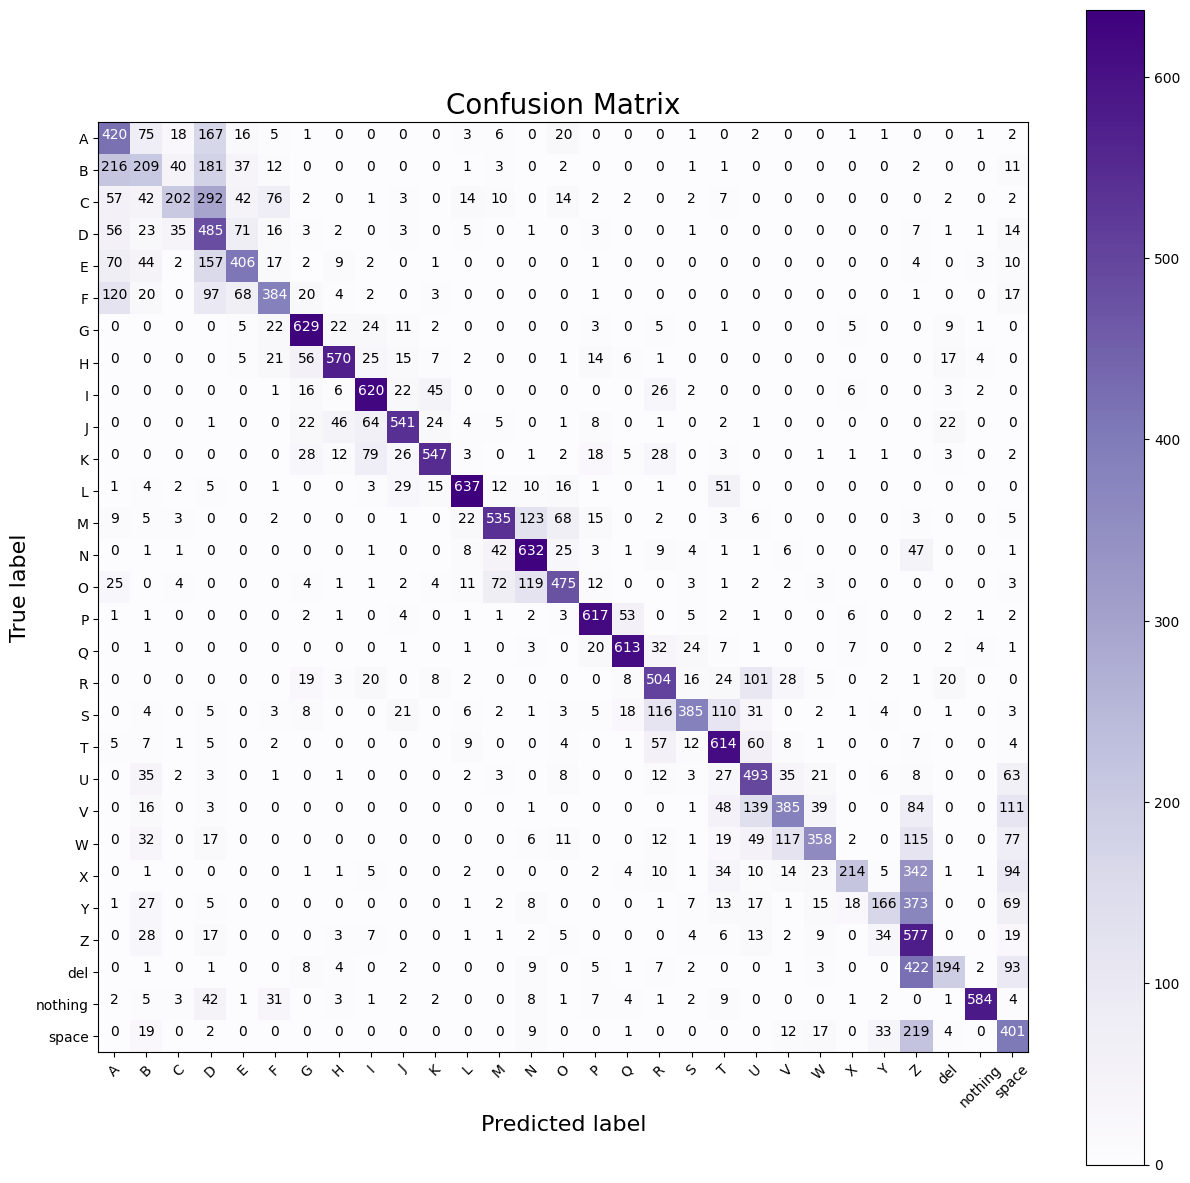

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, ydtcgrid)

In [ ]:
print(grid_search_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7}


In [ ]:
results = pd.DataFrame(grid_search_dt.cv_results_)
results = results.sort_values(by='rank_test_score').head(10)
best_params = results[['params', 'mean_test_score']]

print(best_params)

                                                 params  mean_test_score
1101  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.637640
1097  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.634360
1100  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.633548
1112  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.632307
1096  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.631464
1107  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.630835
1093  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.630697
1098  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.627648
1092  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.627525
1099  {'criterion': 'entropy', 'max_depth': 9, 'max_...         0.627249


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
yknn = knn.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, yknn))

Accuracy is 0.976367816091954


In [ ]:
print(classification_report(y_test,yknn))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       739
           1       0.96      0.98      0.97       716
           2       1.00      0.98      0.99       772
           3       0.97      0.99      0.98       727
           4       0.94      0.97      0.95       728
           5       0.99      0.98      0.98       737
           6       0.99      0.99      0.99       739
           7       0.99      0.99      0.99       744
           8       0.97      0.99      0.98       749
           9       1.00      0.99      1.00       742
          10       0.95      0.99      0.97       760
          11       0.99      0.98      0.99       788
          12       0.98      0.97      0.98       802
          13       0.99      0.99      0.99       783
          14       0.99      0.98      0.98       744
          15       1.00      0.99      1.00       705
          16       1.00      1.00      1.00       717
          17       0.93    

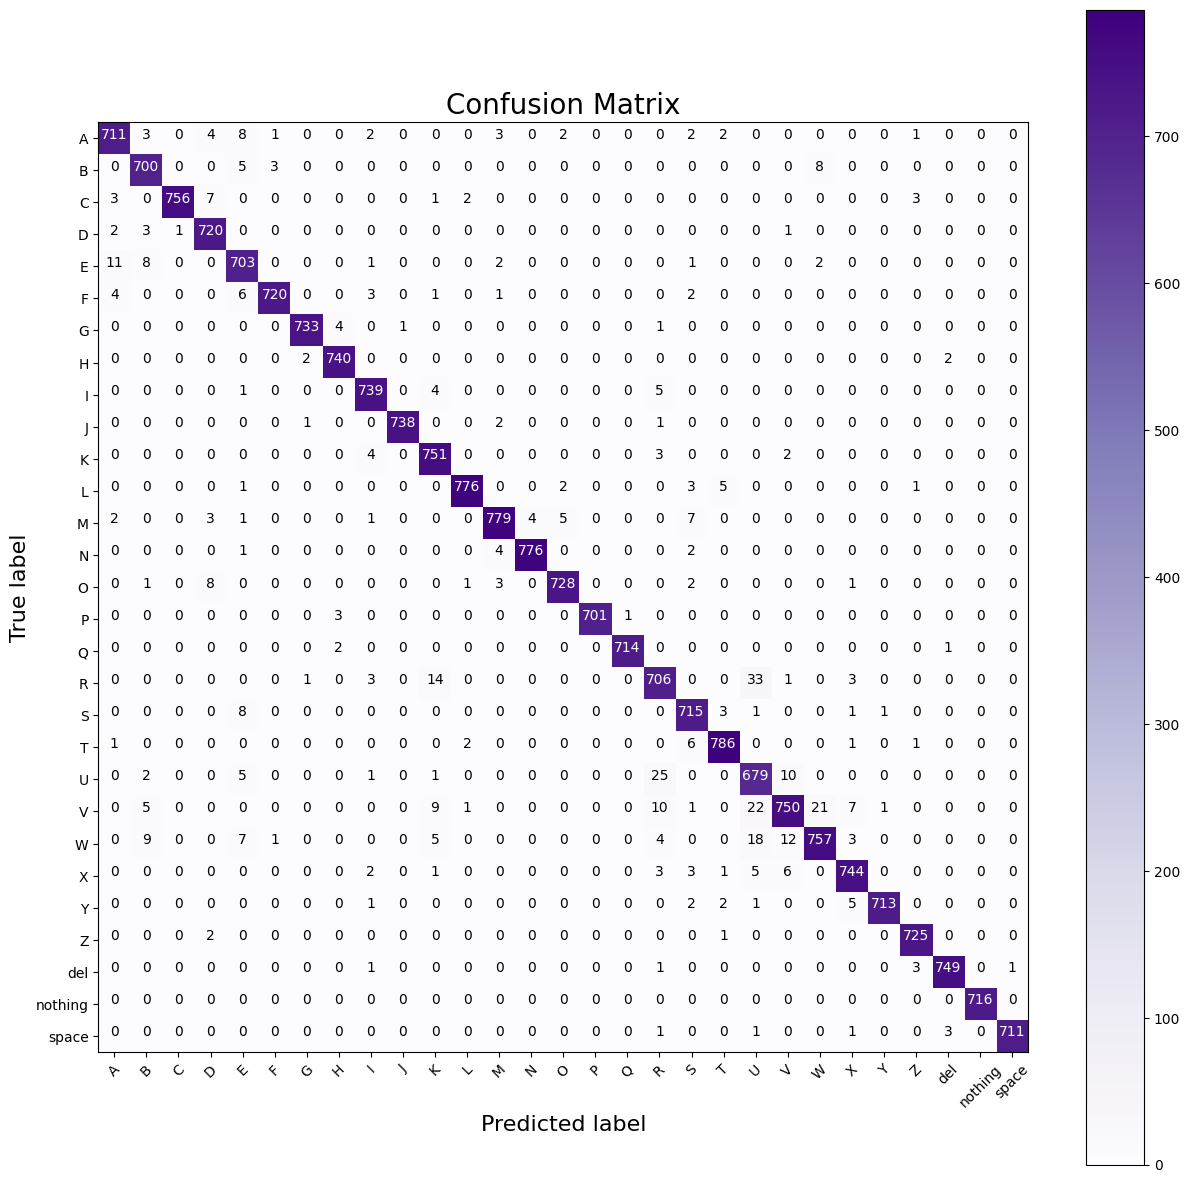

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, yknn)

In [ ]:
# params_rand = {'n_neighbors': [3, 5, 7],
#                'weights': ['uniform', 'distance'],
#                'p': [1, 2]}

# grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params_rand, refit=True, verbose=3, scoring="accuracy", n_jobs=-1)

# grid_search_knn.fit(X_train, y_train)

In [ ]:
knnhype = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', p=1)
knnhype.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [ ]:
yknnhype = knnhype.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, yknnhype))

Accuracy is 0.9948045977011494


In [ ]:
print(classification_report(y_test,yknnhype))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.99      0.99      0.99       716
           2       1.00      0.99      1.00       772
           3       0.99      1.00      0.99       727
           4       0.99      0.99      0.99       728
           5       1.00      1.00      1.00       737
           6       1.00      1.00      1.00       739
           7       1.00      1.00      1.00       744
           8       0.99      0.99      0.99       749
           9       1.00      1.00      1.00       742
          10       0.99      1.00      1.00       760
          11       1.00      1.00      1.00       788
          12       0.99      1.00      1.00       802
          13       1.00      1.00      1.00       783
          14       0.99      0.99      0.99       744
          15       1.00      1.00      1.00       705
          16       1.00      1.00      1.00       717
          17       0.99    

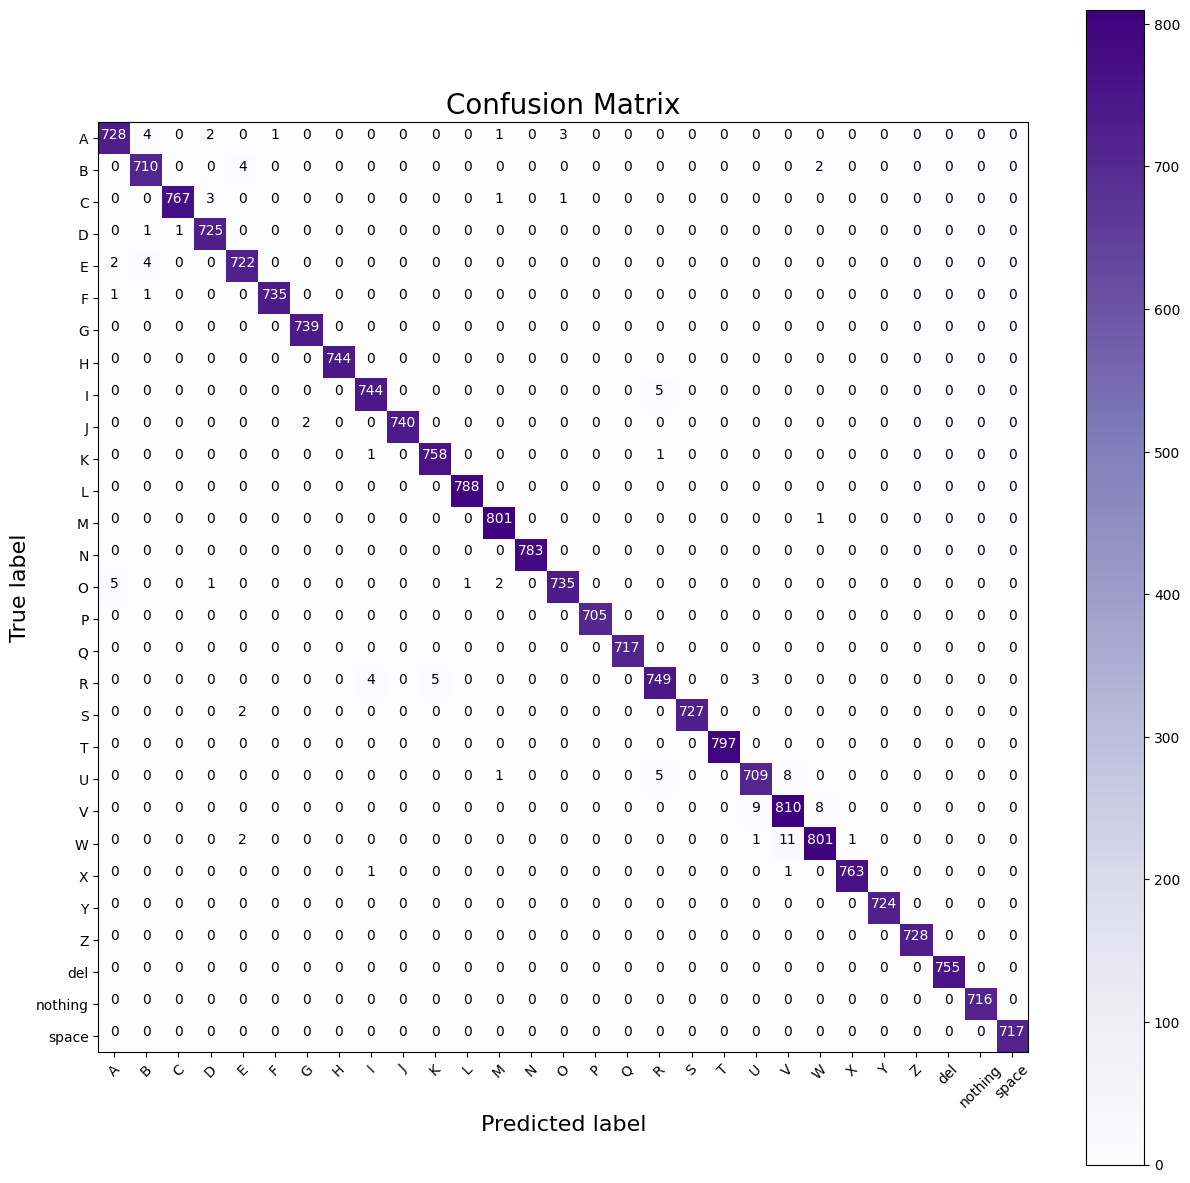

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, yknnhype)

In [ ]:
# print(knnhype.best_params_)

In [ ]:
# results = pd.DataFrame(knnhype.cv_results_)
# results = results.sort_values(by='rank_test_score').head(10)
# best_params = results[['params', 'mean_test_score']]

# print(best_params)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
yrf = rf.predict(X_test)

In [ ]:
print("Accuracy is",accuracy_score(y_test, yrf))

Accuracy is 0.903448275862069


In [ ]:
print(classification_report(y_test,yrf))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        58
           1       0.83      0.77      0.80        52
           2       0.92      0.92      0.92        59
           3       0.85      0.89      0.87        53
           4       0.84      0.91      0.87        46
           5       0.96      0.84      0.90        58
           6       0.98      0.98      0.98        48
           7       0.96      0.91      0.94        56
           8       0.96      0.92      0.94        50
           9       1.00      0.96      0.98        47
          10       0.84      0.95      0.89        44
          11       0.88      1.00      0.94        52
          12       0.94      0.91      0.92        54
          13       0.96      1.00      0.98        52
          14       0.88      0.93      0.90        41
          15       0.98      0.93      0.95        43
          16       0.90      0.96      0.93        46
          17       0.93    

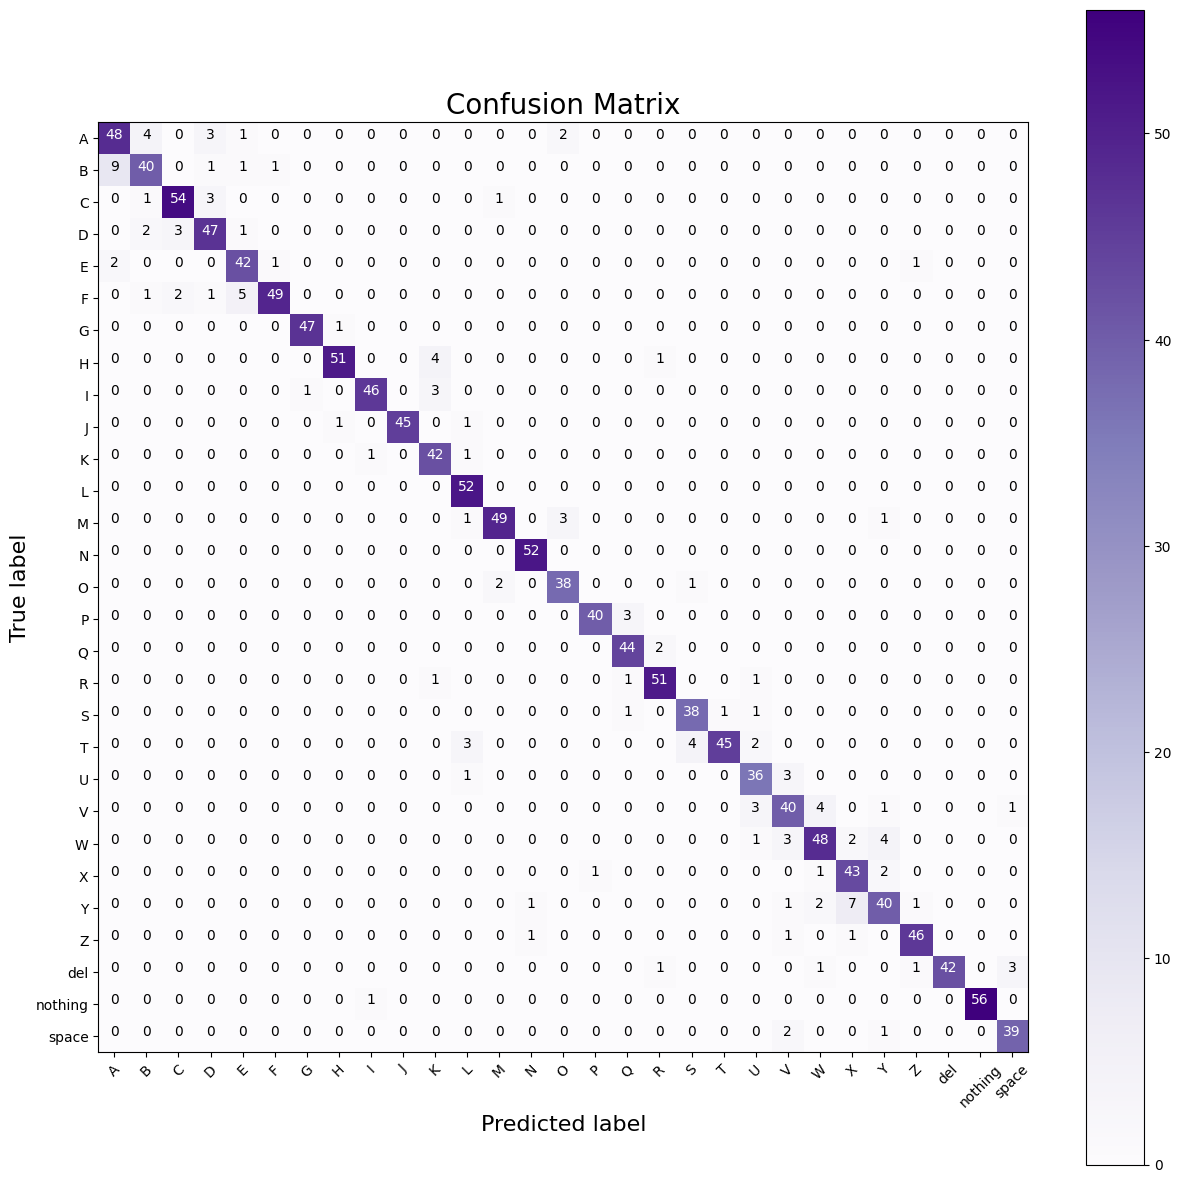

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, yrf)

In [ ]:
params_rand = {
    'n_estimators': [100, 500],
    # 'max_depth': [5, 10, 15, 20, None],
    # 'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=params_rand, refit=True, verbose=3, scoring="accuracy", n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 500]},
             scoring='accuracy', verbose=3)

In [ ]:
yrfgrid = grid_search_rf.predict(X_test)

NameError: ignored

In [ ]:
print("Accuracy is",accuracy_score(y_test, yrfgrid))

In [ ]:
print(classification_report(y_test,yrfgrid))

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_test, yrfgrid)

In [ ]:
print(grid_search_rf.best_params_)

In [ ]:
results = pd.DataFrame(grid_search_rf.cv_results_)
results = results.sort_values(by='rank_test_score').head(10)
best_params = results[['params', 'mean_test_score']]

print(best_params)